# Reading in the texts

In [8]:
# to read in files from a folder
import os
files = {}
filepath = r'C:\Users\Morga\programsMG\TextMining\110'
for filename in os.listdir(filepath):
    if filename.endswith(".txt"):
        fpath = filepath + '/' + filename
        with open(fpath, "r") as file:
            files[filename] = file.read()
len(files) 

429

# Preprocessing

In [9]:
documents =[]
for values in files.values():
    x=values
    documents.append(x)
    
docname =[]
for key in files.keys():
    x=key
    docname.append(x)
    
documents[0][:1000]

"<DOC>\n<DOCNO>Mr. ABERCROMBIE. (DEVELOPING A COMPREHENSIVE STRATEGY IN IRAQ -- (House of Representatives - October 02, 2007))</DOCNO>\n<TEXT>\n   Mr. ABERCROMBIE. Madam Speaker, I would at this point like to thank Mr. Mike Turner for working with us and the committee, right from the get-go, and also Mr. Phil English as well, to demonstrate what we have been saying here that Republicans alone, Democrats alone cannot bring this to an end. It requires us all to work together. \n   Now, there are some, I am sorry to say, on both ends of the spectrum of the parties who want to diminish what the bill is all about and what its intent is all about. Someone went so far yesterday as to say, well, this bill is like naming post offices. \n   Well, yesterday, we named two post offices for marines that were killed in Iraq. I don't suppose the author of that kind of commentary would like to speak with the family of the marines who have been killed about why these post offices were named. \n   I thin

In [10]:
import re
documents_2=[]
for item in documents:
    x=re.sub('\n', '', item)
    x1=re.sub('<DOC>', '', x)
    x2=re.sub('</DOC>', '', x1)
    x3=re.sub('<TEXT>', '', x2)
    x4=re.sub('</TEXT>', '', x3)
    x5=re.sub('<DOCNO>', '', x4)
    x6=re.sub('</DOCNO>', '', x5)
    documents_2.append(x6)
documents_2[0][:1000]

"Mr. ABERCROMBIE. (DEVELOPING A COMPREHENSIVE STRATEGY IN IRAQ -- (House of Representatives - October 02, 2007))   Mr. ABERCROMBIE. Madam Speaker, I would at this point like to thank Mr. Mike Turner for working with us and the committee, right from the get-go, and also Mr. Phil English as well, to demonstrate what we have been saying here that Republicans alone, Democrats alone cannot bring this to an end. It requires us all to work together.    Now, there are some, I am sorry to say, on both ends of the spectrum of the parties who want to diminish what the bill is all about and what its intent is all about. Someone went so far yesterday as to say, well, this bill is like naming post offices.    Well, yesterday, we named two post offices for marines that were killed in Iraq. I don't suppose the author of that kind of commentary would like to speak with the family of the marines who have been killed about why these post offices were named.    I think it's pretty important that we concen

In [11]:
import us

state_names = [state.name for state in us.states.STATES_AND_TERRITORIES]
state_name = []
for item in state_names:
    x=item.lower()
    state_name.append(x)
add_state = ['democrats','democrat','republican','republicans','wilson','davis'
             ,'lee','frank','american', 'carolina', 'dakota', 'hampshire', 'island'
             , 'islands', 'jersey', 'mariana', 'mexico', 'new', 'north', 'northern'
             , 'puerto', 'rhode', 'rico', 'samoa', 'south', 'virgin', 'west', 'york']

In [12]:
import nltk
nltkstopwords = nltk.corpus.stopwords.words('english')
stopwords = nltkstopwords + state_name + add_state

In [13]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)

# Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=no_features
                                , stop_words=stop_words)
tf = tf_vectorizer.fit_transform(documents_2)
tf_feature_names = tf_vectorizer.get_feature_names_out()

# LDA Creation

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics
                                , max_iter=10
                                , learning_method='online'
                                , learning_offset=50.
                                ,random_state=0)
lda_z = lda.fit_transform(tf)

# Inspection

In [16]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [17]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
tax budget spending taxes fiscal earmarks price bills rules aisle
Topic 1:
research science tax technology education space budget provisions fiscal information
Topic 2:
oil gas prices natural price coal got fuel production lot
Topic 3:
housing rule ms consideration rules financial amendments reform assistance affordable
Topic 4:
veterans education college students va school workers student miller labor
Topic 5:
ms iraqi water young veterans transportation oberstar soldiers safety school
Topic 6:
mrs insurance medicare medical schip drug patients coverage food tax
Topic 7:
talk talking group lot got saying trying county kind actually
Topic 8:
intelligence rights human border homeland defense court freedom general international
Topic 9:
tax trade jobs oil colombia agreement economy workers free taxes


In [18]:
import pandas as pd

topics_df = pd.DataFrame(lda_z, columns=["Topic"+str(i) for i in range(no_topics)])
print("Created a (%dx%d) document-topic matrix." % (topics_df.shape[0], topics_df.shape[1]))
topics_df['doc_name']=docname
topics_df.head()

Created a (429x10) document-topic matrix.


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,doc_name
0,0.022728,0.128526,0.124120,0.066496,0.074857,0.000030,0.000030,0.135969,0.447214,0.000030,110_abercrombie_x_hi.txt
1,0.030712,0.000027,0.000027,0.019329,0.000027,0.000027,0.058293,0.024953,0.866578,0.000027,110_ackerman_x_ny.txt
2,0.000121,0.196951,0.000121,0.000121,0.000121,0.000121,0.014880,0.148292,0.594661,0.044613,110_aderholt_x_al.txt
3,0.285522,0.000026,0.082957,0.000026,0.000026,0.000026,0.000026,0.281651,0.348991,0.000752,110_akin_x_mo.txt
4,0.003334,0.003334,0.969992,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,110_alexander_x_la.txt


In [20]:
# runging a loop to place each row into a list inside a list to visually inspect
row_list =[]
#creating a loop to add each row to a list
for index, rows in topics_df.iterrows():
    # Create list for the current row
    temp_list =[rows.Topic0,rows.Topic1,rows.Topic2,rows.Topic3,rows.Topic4
              ,rows.Topic5,rows.Topic6,rows.Topic7,rows.Topic8,rows.Topic9]
    # append the list to another list
    row_list.append(temp_list)
row_list[0]

[0.022728141373833874,
 0.1285255392313753,
 0.12411971403627453,
 0.06649649054394037,
 0.07485683591078524,
 3.0357351749154368e-05,
 3.0358057925396494e-05,
 0.13596851025037238,
 0.4472136962513942,
 3.035699234957352e-05]

In [21]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')

# function to create a chart to easily interpret each text in terms of topic
def graph_text(number):
    values = row_list[number]
    names = ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6',
       'Topic7', 'Topic8', 'Topic9']
    plt.figure(figsize=(60, 10))

    plt.subplot(121)
    plt.bar(names,values)
    plt.ylabel('Probability Distribution')
    plt.xlabel('Topics')
    plt.title(docname[number])
    addlabels(values)
    return plt.show()

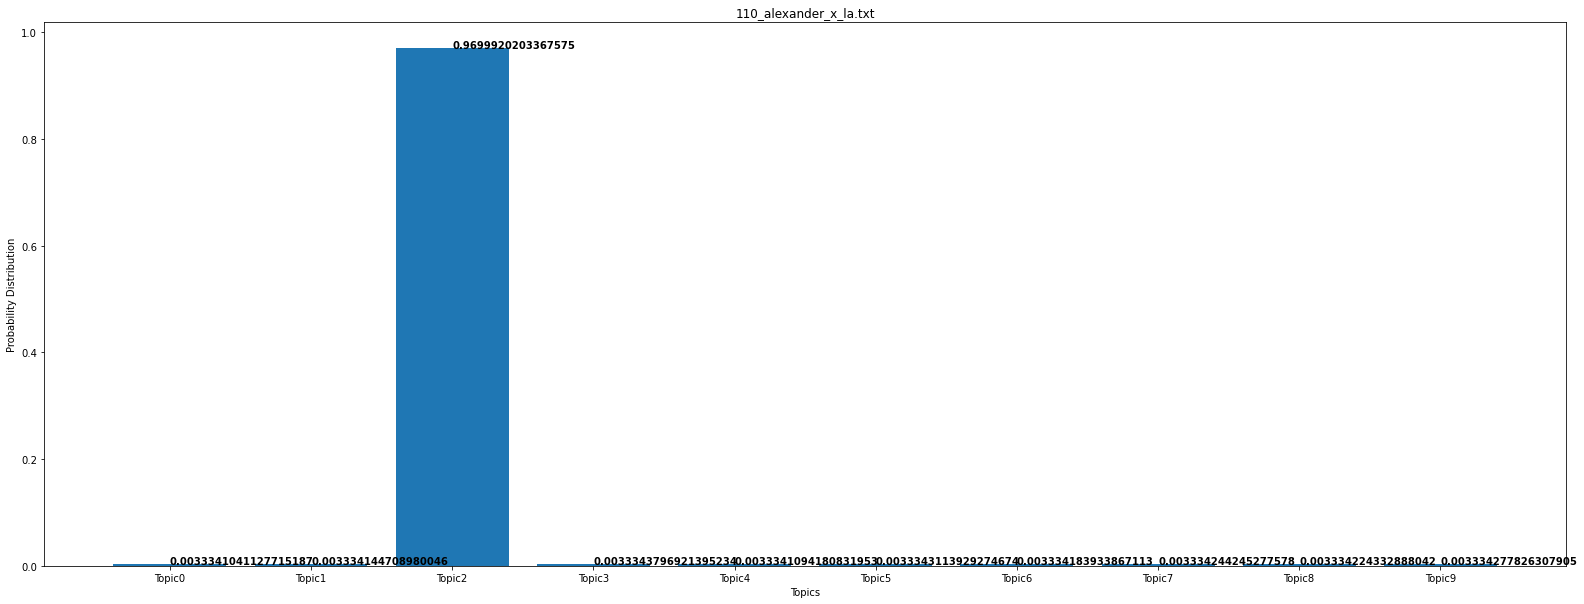

In [22]:
graph_text(4)

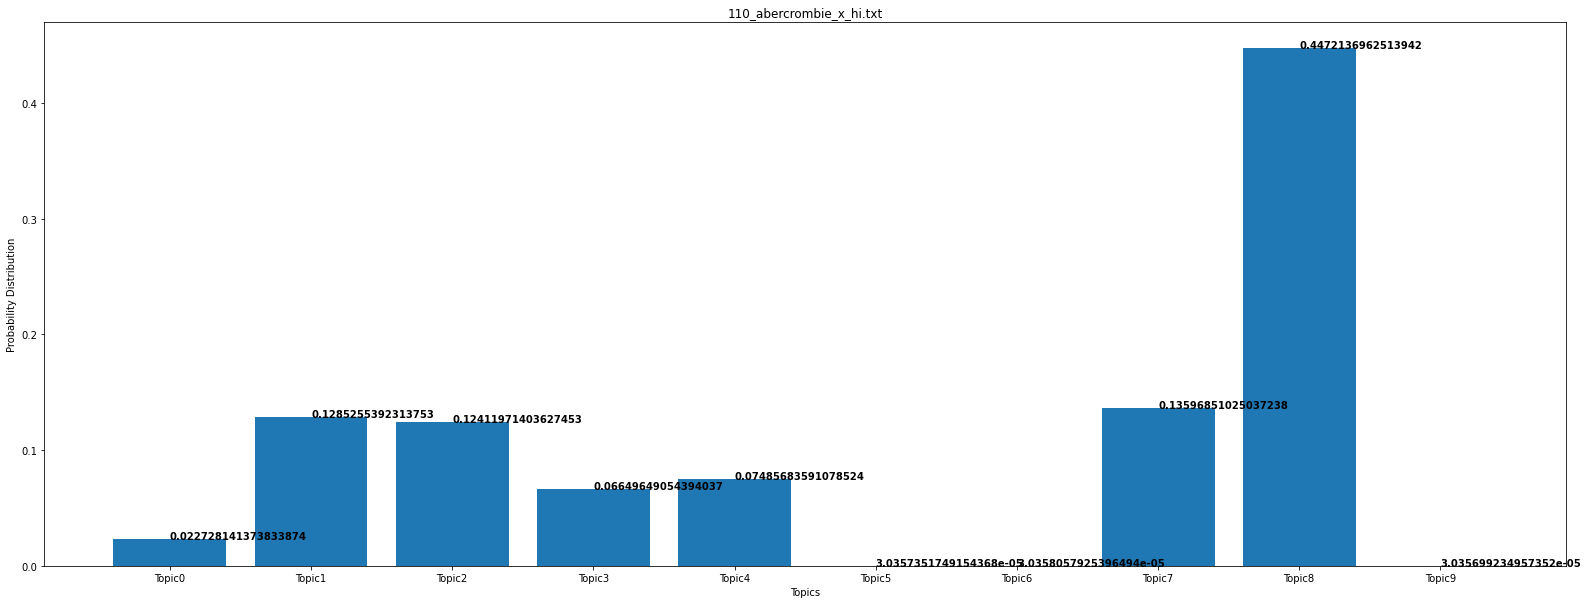

In [26]:
graph_text(0)

In [25]:
documents_2[6]

"Mr. ALTMIRE. (30-SOMETHING WORKING GROUP -- (House of Representatives - July 24, 2008))   Mr. ALTMIRE. And the gentleman is correct, and we were sitting here listening to some of the Members that came before us talk about the importance of supply, and there's a couple of issues.    One is the fact that we are dealing with folks who are advocating increasing supply 10 and 20 years from now. The policies of drilling off the coasts and opening up new areas of the Outer Continental Shelf, opening up the Arctic National Wildlife Refuge in Alaska, the first drop of oil does not come for 10 years. We don't achieve peak capacity in either of those areas for at least 20 years, according to the Department of Energy, President's Bush own Department of Energy. Those aren't our numbers; that's their numbers.    So the issue of increasing supply--and they have a really nice slogan that they like to use: Drill here, drill now. And we'll see them wearing their buttons, and you hear some of the radio 

In [ ]:
display_topics(lda, tf_feature_names, no_top_words)